# Algorithm Overview (20%)
#### Write a clear and concise explanation of the DBSCAN algorithm, covering:
- Cluster Identification: Explain how DBSCAN groups points based on density and
identifies noise.
- Key Parameters: Describe the roles of:
    - eps (epsilon): Defines the neighborhood radius around a point.
    - min_samples: The minimum number of points required to form a dense region.
- Strengths and Limitations:
    - When does DBSCAN work well? (e.g., detecting arbitrarily shaped clusters,
handling noise)
    - When does DBSCAN struggle? (e.g., difficulty in tuning eps, varying density
issues, scalability

- Understand DBSCAN’s mechanics—how it identifies clusters and handles noise
- Compare DBSCAN to k-Means and Hierarchical Clustering, highlighting their strengths
and weaknesses.
- Expand the comparison table from class by adding DBSCAN

# Algorithm Comparison (40%)
### ✅ Visualizations (20%)
Apply DBSCAN, k-Means, and Hierarchical Clustering to at least two different datasets and
present results using clearly labeled plots:
- Dataset where DBSCAN excels (e.g., non-spherical clusters, datasets with noise).
- Dataset where DBSCAN struggles (e.g., varying densities, difficulty tuning eps).

#### Dataset Selection (Using sklearn Datasets)
To ensure consistency, you may use datasets from sklearn.datasets such as:
- make_moons(n_samples=300, noise=0.05) → Good for DBSCAN (non-spherical
clusters).
-  make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])
    - → Shows DBSCAN struggles with varying densities.
-  make_circles(n_samples=300, factor=0.5, noise=0.05) 
    - → Highlights DBSCAN's ability to handle non-linearly separable data.

Ensure plots are easy to interpret with appropriate axis labels, legends, and titles.

### ✅ Analysis (20%)
- Compare performance: When does DBSCAN outperform k-Means and Hierarchical
Clustering?
- Discuss failure cases: When does DBSCAN struggle, and why?
- Trade-offs: What factors influence the choice between these clustering methods?

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

def plot_clustering_results(X, labels, centers, silhouette_avg, n_clusters=4):
    """
    Plots the clustering results and the silhouette scores for each sample.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data points.
    labels : array-like, shape (n_samples,)
        The cluster labels for each data point.
    centers : array-like, shape (n_clusters, n_features), optional
        The coordinates of the cluster centers. If None, no centers are plotted.
    silhouette_avg : float
        The average silhouette score for all the samples.
    n_clusters : int, optional, default=4
        The number of clusters.

    Returns:
    None
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # Plot the clustering result
    ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    if centers is not None:
        ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('Clustering Result')

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax2.set_yticks([])
    ax2.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

In [52]:
import sklearn.datasets as skd 
moons = skd.make_moons(n_samples=300, noise=0.05) 
# → Good for DBSCAN (non-spherical clusters).
blobs = skd.make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])
# → Shows DBSCAN struggles with varying densities.
circle = skd.make_circles(n_samples=300, factor=0.5, noise=0.05) 
# → Highlights DBSCAN's ability to handle non-linearly separable data.


c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k-Menas silhouette Score: 0.45549412714670934


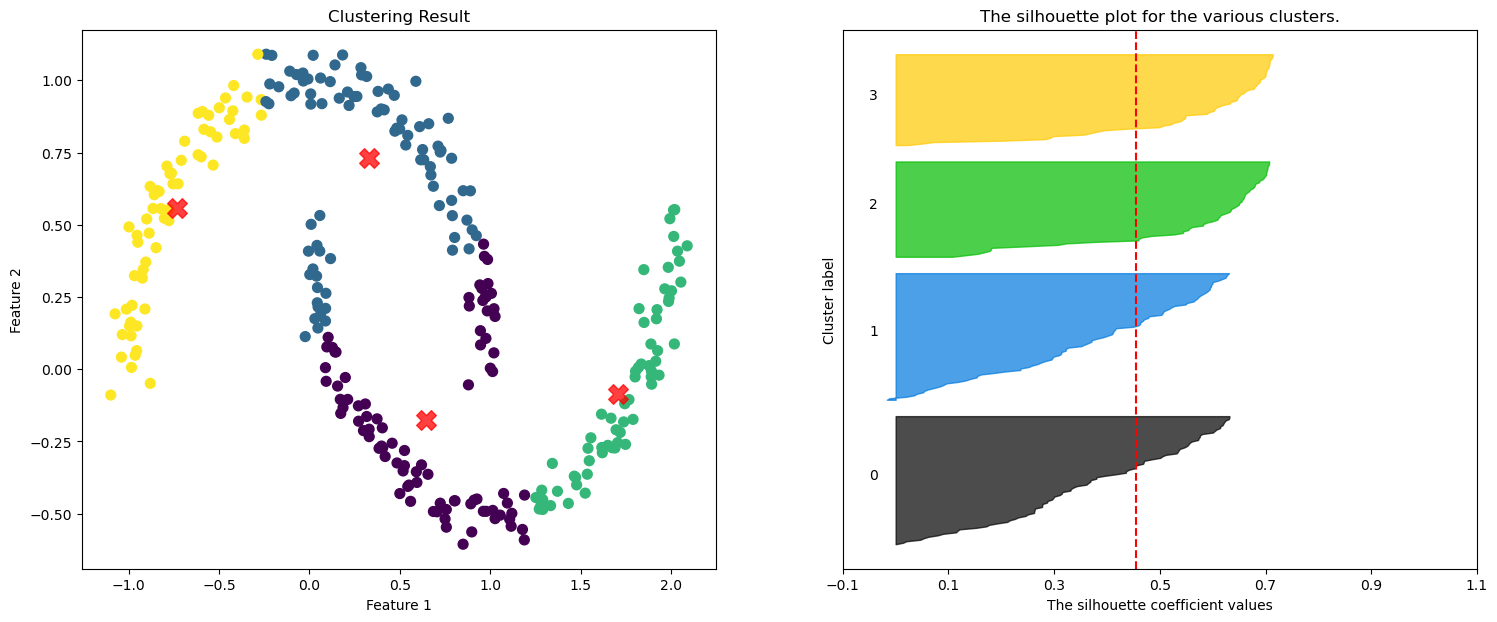

Agglomerative clustering silhouette Score: 0.4640420877400611


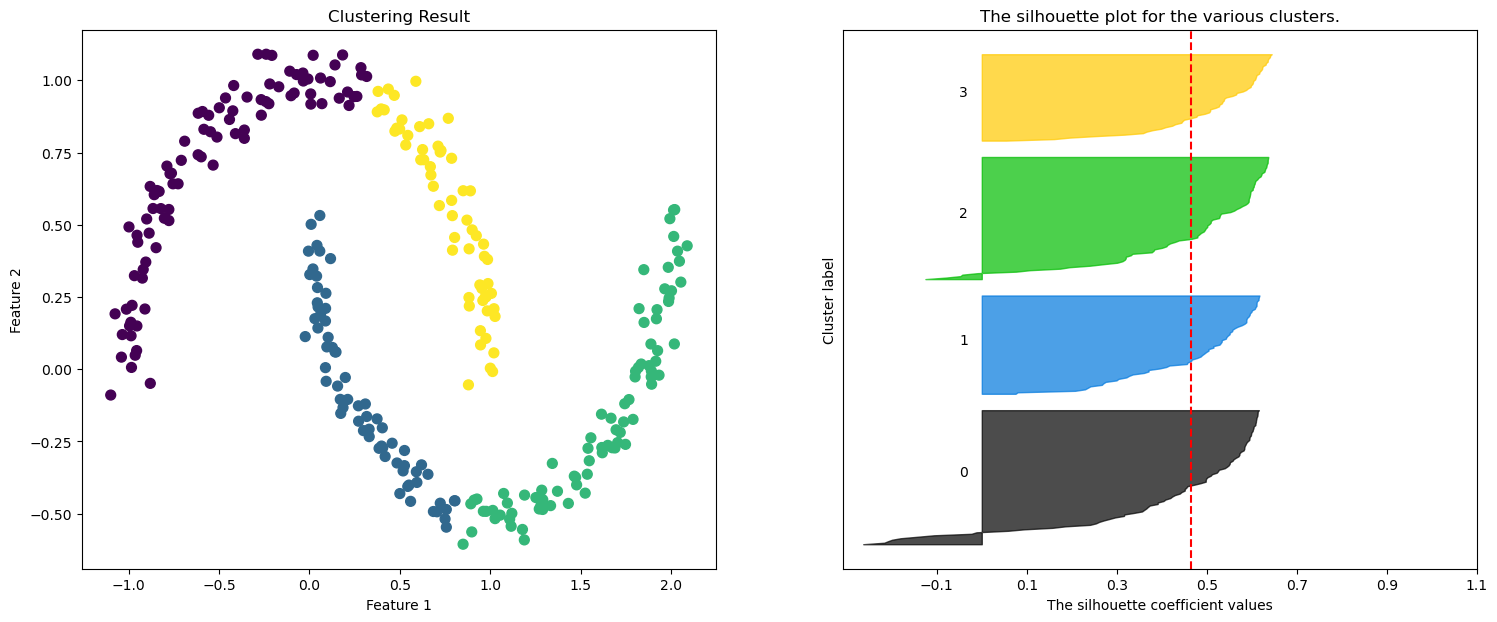

Number of clusters + noise: (2, 0)
DBSCAN silhouette score: 0.32643850950337056


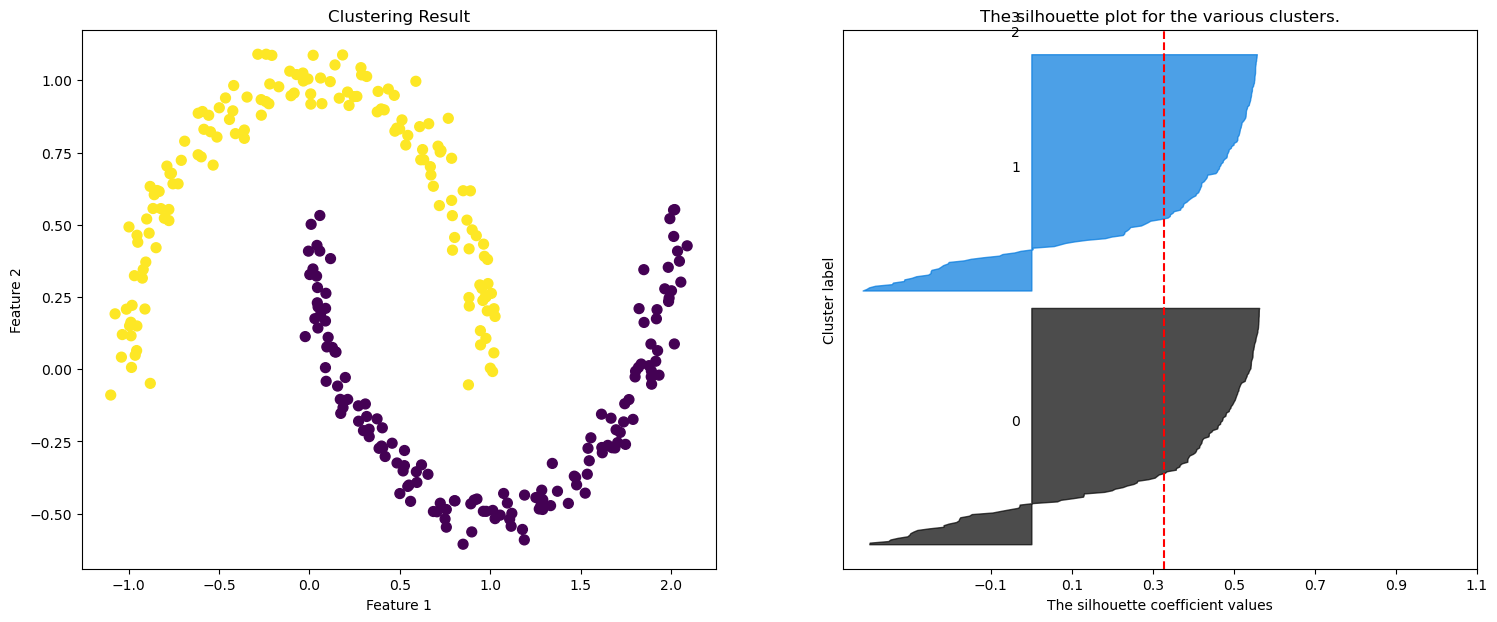

In [53]:
X_moon, y_moon = skd.make_moons(n_samples=300, noise=0.05) 
# → Good for DBSCAN (non-spherical clusters).

# k-Means INITIALISE, FIT, PREDICT ==================
kmeans = KMeans(n_clusters=4, max_iter=14, random_state=42)
kmeans.fit(X_moon)
y_moon_kmeans = kmeans.predict(X_moon)
# Evaluate the model
silhouette_kmeans_avg = silhouette_score(X_moon, y_moon_kmeans)
print(f"k-Menas silhouette Score: {silhouette_kmeans_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
plot_clustering_results(X_moon, y_moon_kmeans, centers, silhouette_kmeans_avg, n_clusters=4)

# Agglomerative =======================================

#  INITIALISE, FIT, PREDICT
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X_moon)
# Evaluate the model
silhouette_agg_avg = silhouette_score(X_moon, y_agg)
print(f"Agglomerative clustering silhouette Score: {silhouette_agg_avg}")

# Plot the clustering results using the custom function
plot_clustering_results(X_moon, y_agg, None, silhouette_agg_avg, n_clusters=4)

# DBSCAN  ===========================================
dbscan = DBSCAN(eps=0.2, min_samples=7)
y_dbs = dbscan.fit_predict(X_moon)
labels=dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


silhouette_dbs_avg = silhouette_score(X_moon, y_dbs)
print(f"Number of clusters + noise: {n_clusters_, n_noise_}")
print(f"DBSCAN silhouette score: {silhouette_dbs_avg}")

plot_clustering_results(X_moon, y_dbs, None, silhouette_dbs_avg)

c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k-Menas silhouette Score: 0.6853947374307946


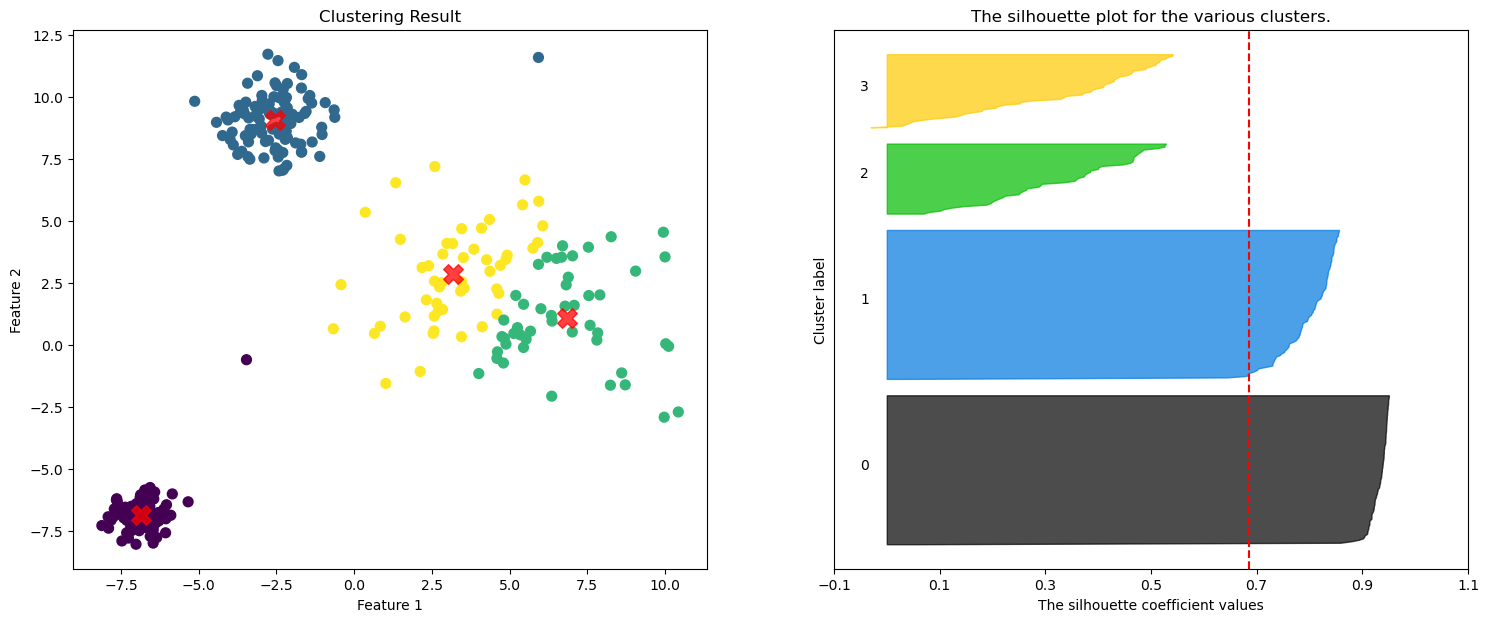

Agglomerative clustering silhouette Score: 0.6803829584887975


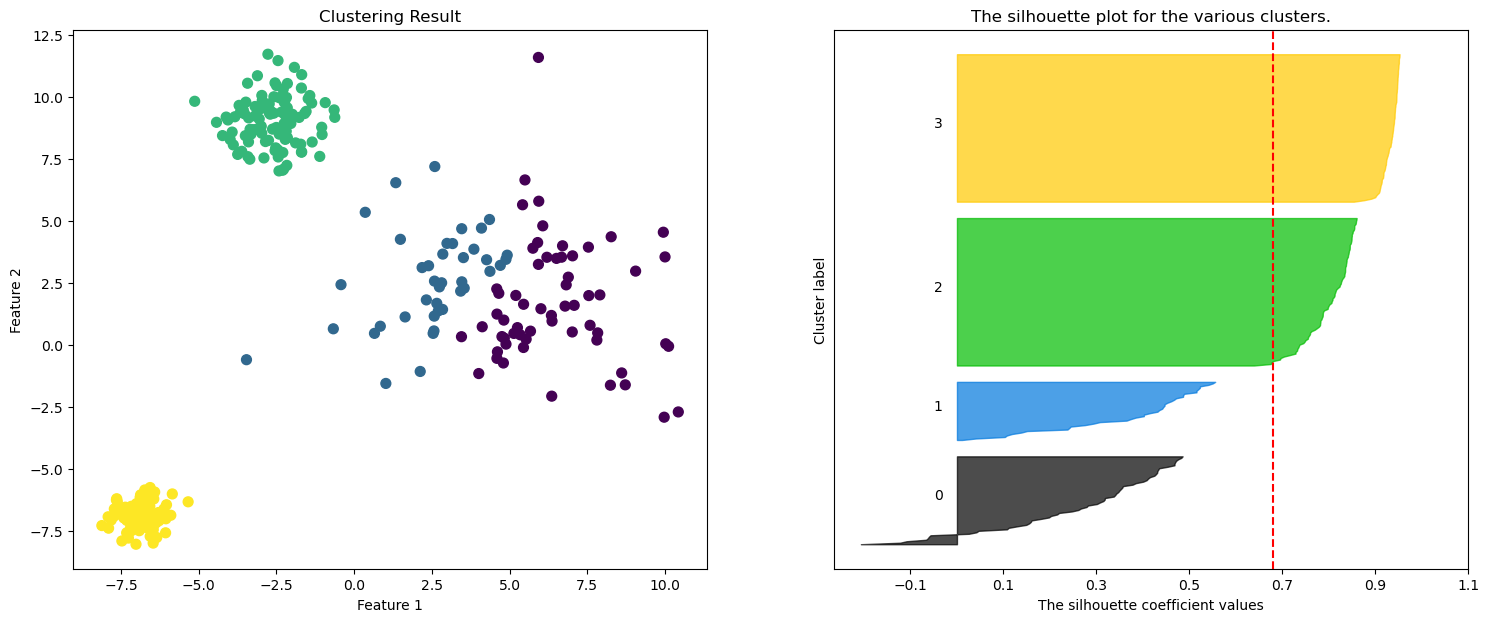

Number of clusters + noise: (1, 258)
DBSCAN silhouette score: 0.25206262807775476


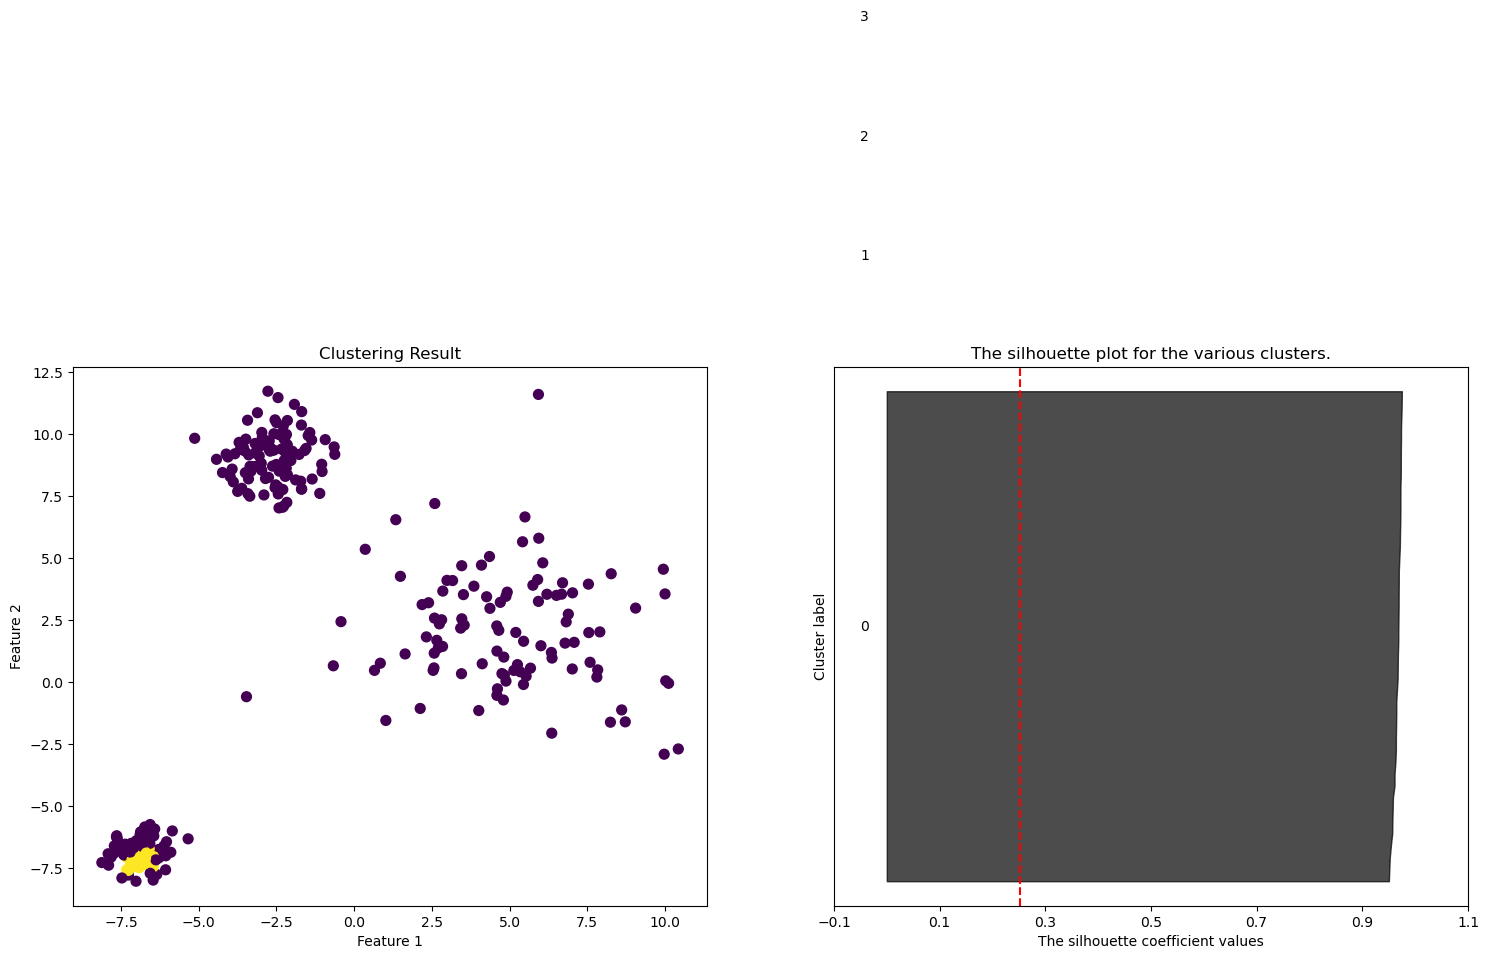

In [54]:
X_blob, y_blob = skd.make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
# → Shows DBSCAN struggles with varying densities.

# k-Means INITIALISE, FIT, PREDICT ==================
kmeans = KMeans(n_clusters=4, max_iter=14)
kmeans.fit(X_blob)
y_blob_kmeans = kmeans.predict(X_blob)
# Evaluate the model
silhouette_kmeans_avg = silhouette_score(X_blob, y_blob_kmeans)
print(f"k-Menas silhouette Score: {silhouette_kmeans_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
plot_clustering_results(X_blob, y_blob_kmeans, centers, silhouette_kmeans_avg, n_clusters=4)

# Agglomerative =======================================

#  INITIALISE, FIT, PREDICT
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X_blob)
# Evaluate the model
silhouette_agg_avg = silhouette_score(X_blob, y_agg)
print(f"Agglomerative clustering silhouette Score: {silhouette_agg_avg}")

# Plot the clustering results using the custom function
plot_clustering_results(X_blob, y_agg, None, silhouette_agg_avg, n_clusters=4)

# DBSCAN  ===========================================
dbscan = DBSCAN(eps=0.4, min_samples=7)
y_dbs = dbscan.fit_predict(X_blob)
labels=dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

dbscan = DBSCAN(eps=0.2, min_samples=7)
y_dbs = dbscan.fit_predict(X_blob)
labels=dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

silhouette_dbs_avg = silhouette_score(X_blob, y_dbs)
print(f"Number of clusters + noise: {n_clusters_, n_noise_}")
print(f"DBSCAN silhouette score: {silhouette_dbs_avg}")

plot_clustering_results(X_blob, y_dbs, None, silhouette_dbs_avg)


c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k-Menas silhouette Score: 0.3842637598056674


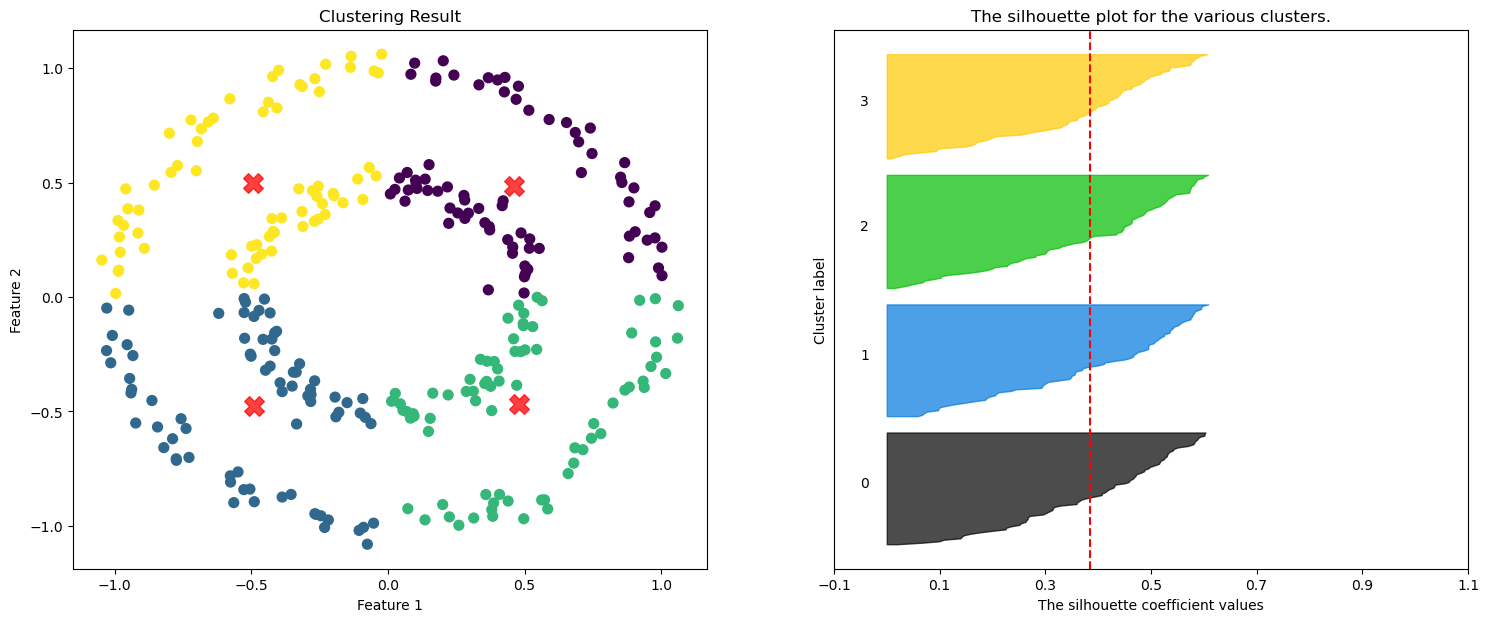

Agglomerative clustering silhouette Score: 0.3244495420710434


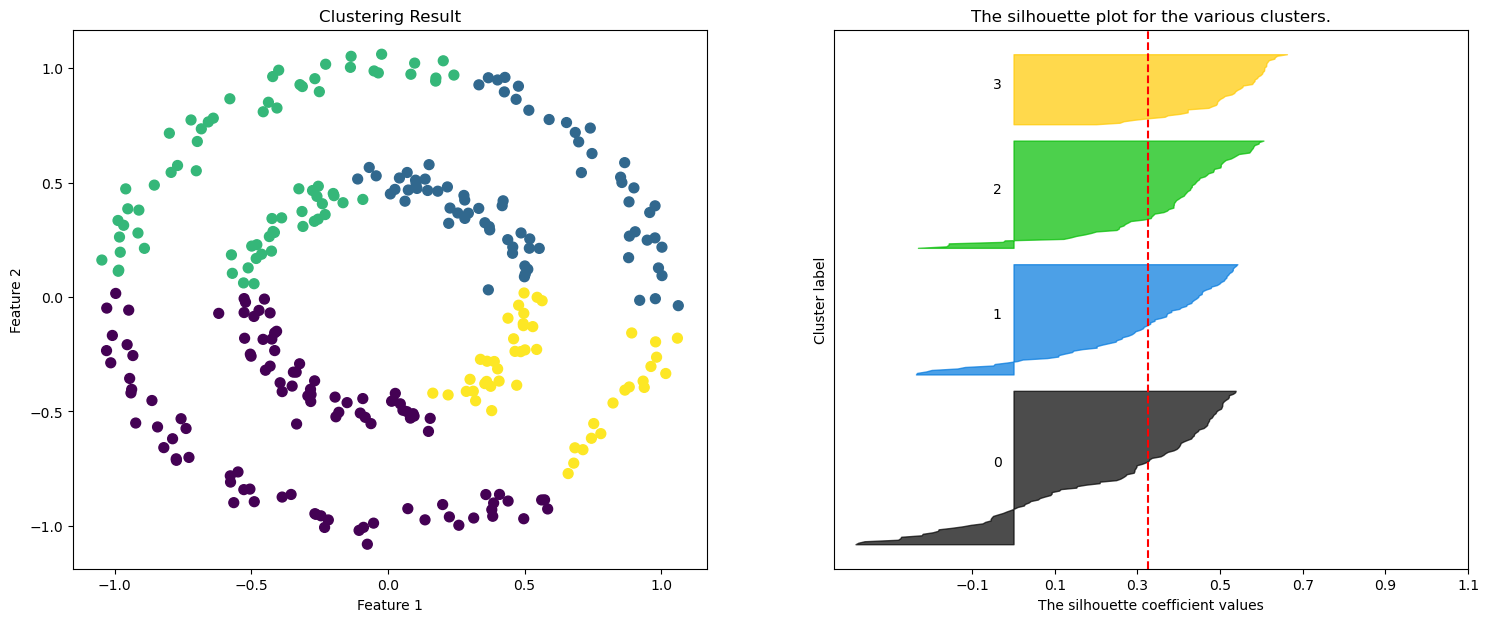

Number of clusters + noise: (2, 0)
DBSCAN silhouette score: 0.1073437576489196


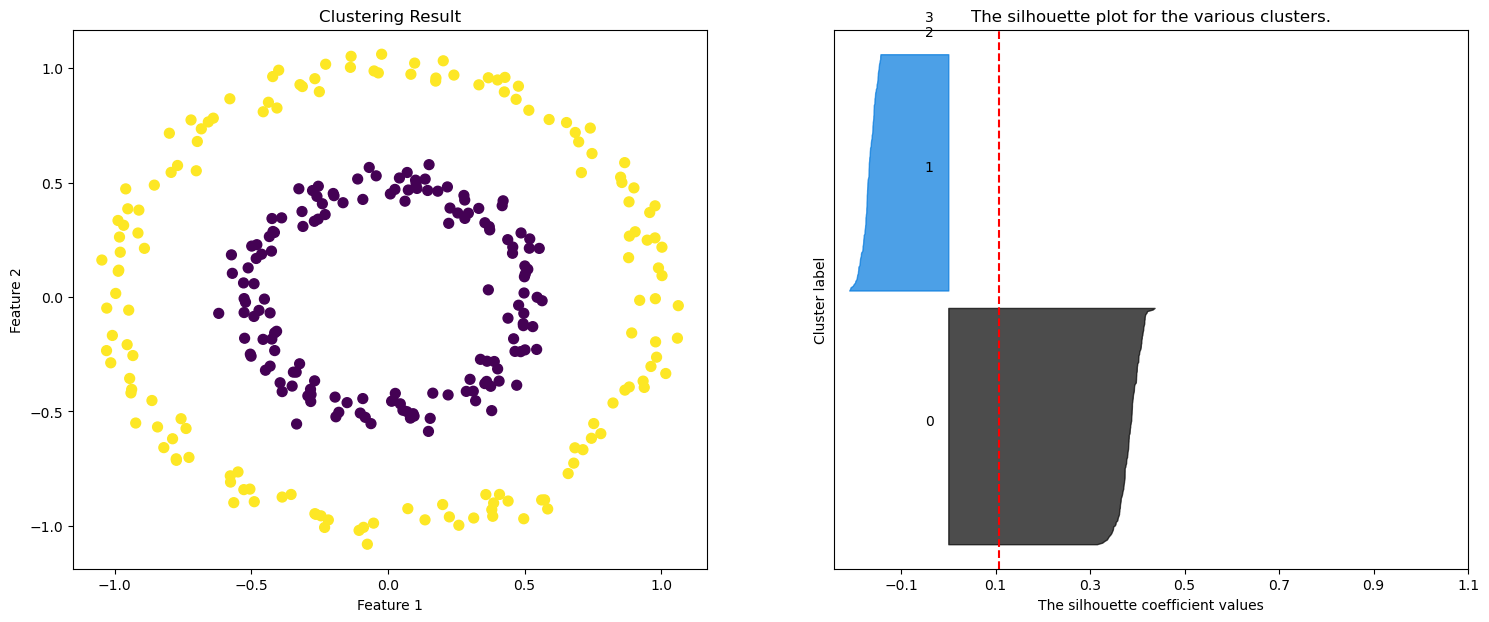

In [57]:
X_circle, y_circle = skd.make_circles(n_samples=300, factor=0.5, noise=0.05) 
# → Highlights DBSCAN's ability to handle non-linearly separable data.

# k-Means INITIALISE, FIT, PREDICT ==================
kmeans = KMeans(n_clusters=4, max_iter=14)
kmeans.fit(X_circle)
y_blob_kmeans = kmeans.predict(X_circle)
# Evaluate the model
silhouette_kmeans_avg = silhouette_score(X_circle, y_blob_kmeans)
print(f"k-Menas silhouette Score: {silhouette_kmeans_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
plot_clustering_results(X_circle, y_blob_kmeans, centers, silhouette_kmeans_avg, n_clusters=4)

# Agglomerative =======================================

#  INITIALISE, FIT, PREDICT
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X_circle)
# Evaluate the model
silhouette_agg_avg = silhouette_score(X_circle, y_agg)
print(f"Agglomerative clustering silhouette Score: {silhouette_agg_avg}")

# Plot the clustering results using the custom function
plot_clustering_results(X_circle, y_agg, None, silhouette_agg_avg, n_clusters=4)

# DBSCAN  ===========================================
dbscan = DBSCAN(eps=0.2, min_samples=7)
y_dbs = dbscan.fit_predict(X_circle)
labels=dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

silhouette_dbs_avg = silhouette_score(X_circle, y_dbs)
print(f"Number of clusters + noise: {n_clusters_, n_noise_}")
print(f"DBSCAN silhouette score: {silhouette_dbs_avg}")

plot_clustering_results(X_circle, y_dbs, None, silhouette_dbs_avg)


# Expand the comparison table from class by adding a new column for DBSCAN 
🔹 Expectations for the Table:
● Keep descriptions concise yet informative—use bullet points where necessary.
● Support key points with examples from your visualizations (e.g., if DBSCAN handles
noise well, reference your dataset).


## Key Differences  

| Feature               | k-Means                     | Hierarchical Clustering (Agglomerative) |
|-----------------------|----------------------------|-----------------------------------------|
| **Approach**         | Partition-based, centroid-driven | Hierarchical, distance-driven |
| **Cluster Shape**    | Prefers spherical clusters | Can detect various cluster shapes |
| **Number of Clusters** | Must predefine `k` | Dendrogram can help determine `k` |
| **Scalability**      | Efficient for large datasets | Computationally expensive for large `n` |
| **Result Type**      | Hard assignments | Hierarchical tree (dendrogram) |

---

📌 **When to Use Which?**  
- Use **k-Means** when you need fast, efficient clustering for large datasets with well-separated groups.  
- Use **Hierarchical Clustering** when you want to analyze **cluster relationships** and don't want to predefine `k`.  